In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test= pd.read_csv(r'C:\Users\Abhishek Nazare\Documents\ML Datasets\titanic data set\titanic\test.csv')
train = pd.read_csv(r'C:\Users\Abhishek Nazare\Documents\ML Datasets\titanic data set\titanic\train.csv')

In [3]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

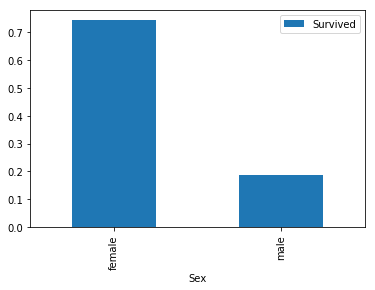

In [6]:
sex_pivot = train.pivot_table(index='Sex', values='Survived') #pivot object of sex v/s survived
sex_pivot.plot.bar()                                          #created plot object
plt.show()                                                    #plot the graph

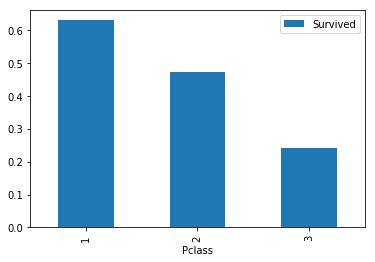

In [7]:
Pclass_pivot=train.pivot_table(index='Pclass', values='Survived')
Pclass_pivot.plot.bar()
plt.show()

In [8]:
print(train['Age'].shape)
train['Age'].describe()


(891,)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

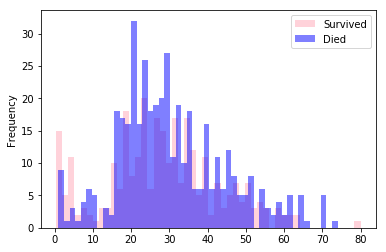

In [9]:
train[train['Survived'] ==1]['Age'].plot.hist(alpha = 0.7, color = 'pink', bins=50)
train[train['Survived'] ==0]['Age'].plot.hist(alpha = 0.5, color = 'blue', bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [10]:
def process_age(df, cut_points, cut_labels):
    df['Age'] = df['Age'].fillna(-0.5)
    df['Age_Categories'] = pd.cut(df['Age'], cut_points, labels=cut_labels)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)


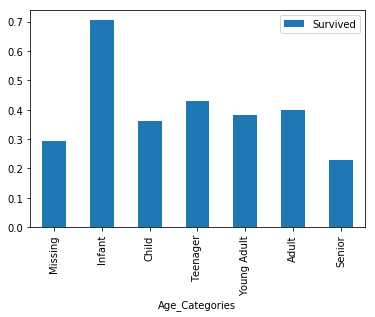

In [11]:
age_cat_pivot = train.pivot_table(index='Age_Categories', values='Survived')
age_cat_pivot.plot.bar()
plt.show()

In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Categories'],
      dtype='object')

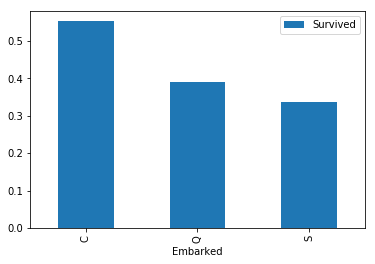

In [13]:
emb_pivot = train.pivot_table(index='Embarked', values='Survived')
emb_pivot.plot.bar()
plt.show()


In [14]:
# train['Embarked'].value_counts()
train['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

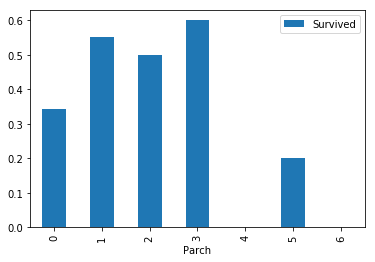

In [15]:
fare_pivot = train.pivot_table(index='Parch', values='Survived')
fare_pivot.plot.bar()
plt.show()

In [16]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_Categories","Embarked"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [17]:
train['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Categories',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_Categories_Missing', 'Age_Categories_Infant',
       'Age_Categories_Child', 'Age_Categories_Teenager',
       'Age_Categories_Young Adult', 'Age_Categories_Adult',
       'Age_Categories_Senior', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [19]:
from sklearn.linear_model import LogisticRegression

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_Categories_Missing','Age_Categories_Infant',
       'Age_Categories_Child', 'Age_Categories_Teenager',
       'Age_Categories_Young Adult', 'Age_Categories_Adult',
      'Age_Categories_Senior', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

lr = LogisticRegression(solver='liblinear')
lr.fit(train[columns], train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

In [22]:
lr = LogisticRegression(solver='liblinear')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [23]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
accuracy

0.8212290502793296

In [25]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver='liblinear')

scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.7752809  0.78651685 0.78651685 0.79775281 0.79775281 0.81111111
 0.81818182 0.83333333 0.84269663 0.86516854]
0.811431165588469


In [26]:
lr = LogisticRegression(solver='liblinear')
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])

In [27]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

In [28]:
submission.to_csv(r"C:\Users\Abhishek Nazare\Documents\ML Datasets\titanic data set\titanic\submission.csv",index=False)